In [3]:
!pip install pyforest

Defaulting to user installation because normal site-packages is not writeable


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
dff = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
df = pd.concat([dff,test])

In [21]:
dff

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [22]:
dff.shape

(1460, 81)

In [11]:
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 324.4/324.4 kB 1.4 MB/s eta 0:00:00
     ------------------------------------ 345.9/345.9 kB 766.4 kB/s eta 0:00:00
     ------------------------------------ 296.5/296.5 kB 834.7 kB/s eta 0:00:00
     ------------------------------------ 102.7/102.7 kB 494.3 kB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 663.5/663.5 kB 853.9 kB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 361.8 kB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=19ce4da5c9330878c34e4e48e1e57bb9c69f9b337c9dcd607523baca6589bcfa
  Stored in directory: c:\users\tejavarma\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [14]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 15.1/15.1 MB 358.1 kB/s eta 0:00:00


In [15]:
import sweetviz as sv
report = sv.analyze(dff)

                                             |                                             | [  0%]   00:00 ->…

In [17]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
df.set_index('Id',inplace=True)
df.SalePrice.fillna(0,inplace=True)
dff.shape

(1460, 81)

In [24]:
type(dff)

pandas.core.frame.DataFrame

In [25]:
df.shape

(2919, 80)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [27]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [28]:
df.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40, 150], dtype=int64)

In [29]:
df.MSSubClass.nunique()

16

In [30]:
cols = df.columns

In [31]:
Features_non_null = []
Features_null = []
for i in cols:
    if df[i].isnull().sum() == 0:
        Features_non_null.append(i)
    else:
        Features_null.append((i,df[i].isnull().sum()))

In [32]:
Features_non_null

['MSSubClass',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleCondition',
 'SalePrice']

In [33]:
Features_null

[('MSZoning', 4),
 ('LotFrontage', 486),
 ('Alley', 2721),
 ('Utilities', 2),
 ('Exterior1st', 1),
 ('Exterior2nd', 1),
 ('MasVnrType', 24),
 ('MasVnrArea', 23),
 ('BsmtQual', 81),
 ('BsmtCond', 82),
 ('BsmtExposure', 82),
 ('BsmtFinType1', 79),
 ('BsmtFinSF1', 1),
 ('BsmtFinType2', 80),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('Electrical', 1),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('KitchenQual', 1),
 ('Functional', 2),
 ('FireplaceQu', 1420),
 ('GarageType', 157),
 ('GarageYrBlt', 159),
 ('GarageFinish', 159),
 ('GarageCars', 1),
 ('GarageArea', 1),
 ('GarageQual', 159),
 ('GarageCond', 159),
 ('PoolQC', 2909),
 ('Fence', 2348),
 ('MiscFeature', 2814),
 ('SaleType', 1)]

In [34]:
for i in Features_null:
    if i[1]>300:
        df.drop(i[0],axis= 1,inplace=True)
        Features_null.pop(Features_null.index(i))

In [35]:
df

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,6,2006,WD,Normal,0.0
2916,160,RM,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,4,2006,WD,Abnorml,0.0
2917,20,RL,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2006,WD,Abnorml,0.0


Text(0.5, 1.0, 'Types of Houses in Sale')

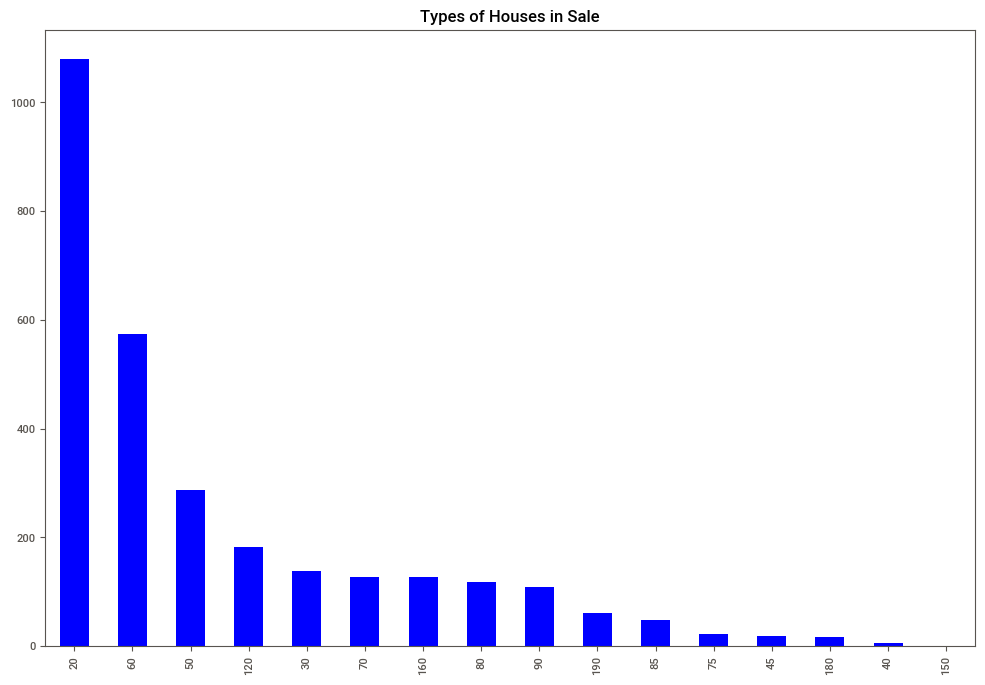

In [39]:
plt.figure(figsize=(12,8))
df.MSSubClass.value_counts().plot(kind="bar",color='b')
plt.title("Types of Houses in Sale")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cumulative sum of Prices based on the type of residence')

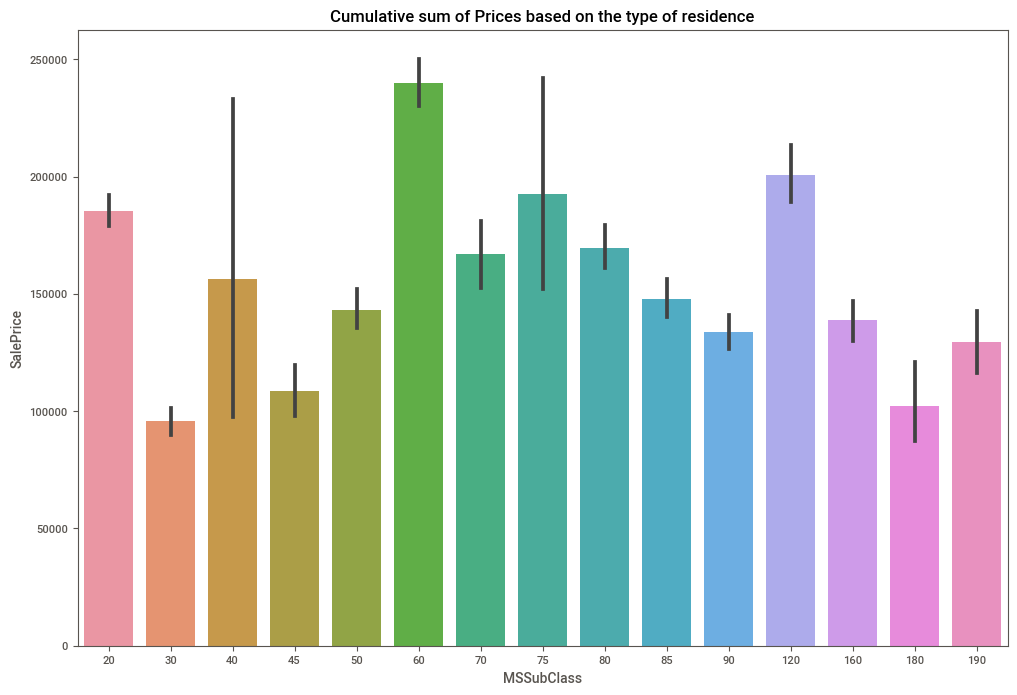

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(df["MSSubClass"][:1460],df["SalePrice"][:1460])
plt.title("Cumulative sum of Prices based on the type of residence")

In [41]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
df.MSZoning.isnull().sum()

4

In [43]:
df[df["MSZoning"].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


In [44]:
dff.MSZoning.value_counts()


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [46]:
df.MSZoning.fillna("RL",inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cumulative price of houses based on their Zones')

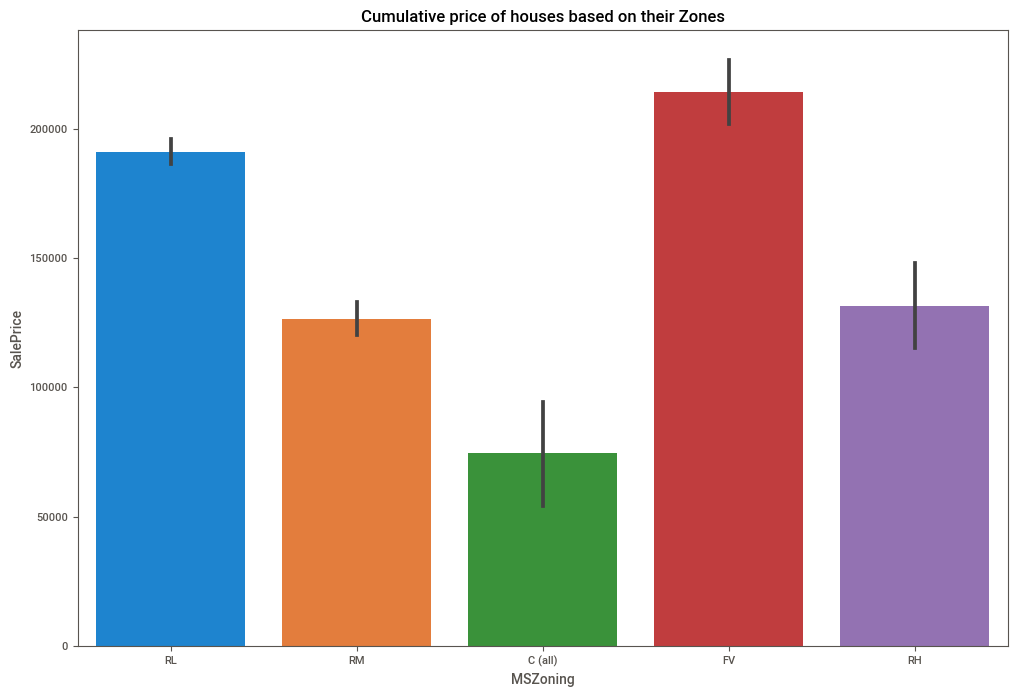

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(dff["MSZoning"],dff["SalePrice"])
plt.title("Cumulative price of houses based on their Zones")

In [48]:
from sklearn.preprocessing import OrdinalEncoder
df[["MSZoning"]]=OrdinalEncoder().fit_transform(df[["MSZoning"]])

In [49]:
df.MSZoning.value_counts()

3.0    2269
4.0     460
1.0     139
2.0      26
0.0      25
Name: MSZoning, dtype: int64

In [50]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,3.0,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,3.0,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,3.0,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,3.0,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4.0,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,4.0,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,3.0,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,3.0,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

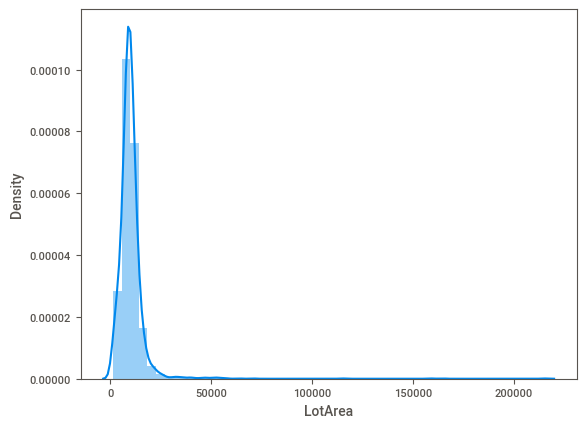

In [51]:
sns.distplot(df['LotArea'])

In [52]:
df.LotArea.describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

In [53]:
count = 0
for i in df.LotArea:
    if i>25000:
        count += 1
        
print(count)

48


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

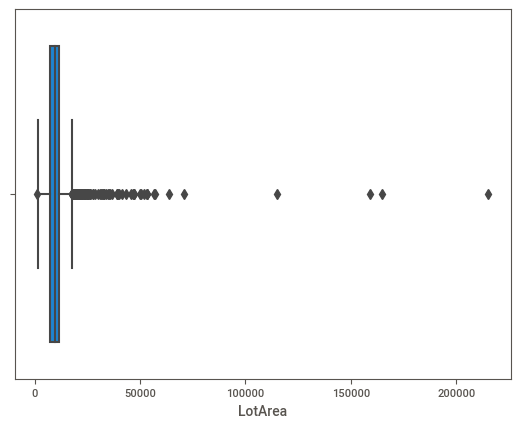

In [54]:
sns.boxplot(df["LotArea"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

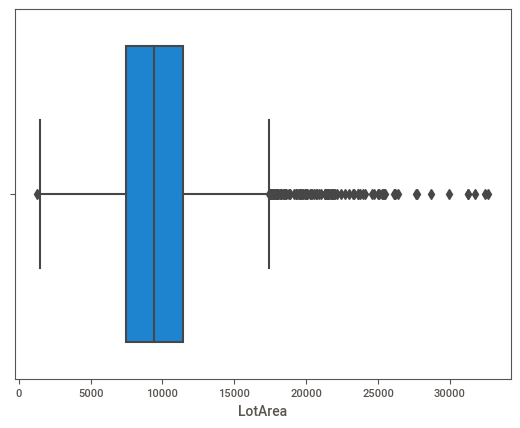

In [55]:
upper_limit = df.LotArea.quantile(.99)
df.drop(df.loc[df['LotArea']>upper_limit].index,inplace = True)
# df.loc[df['LotArea']>upper_limit].index
sns.boxplot(df["LotArea"])

In [56]:
df[['LotArea',"SalePrice"]].corr()

,LotArea,SalePrice
LotArea,1.00000,0.38835
SalePrice,0.38835,1.00000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'LotArea  Vs  SalePrice')

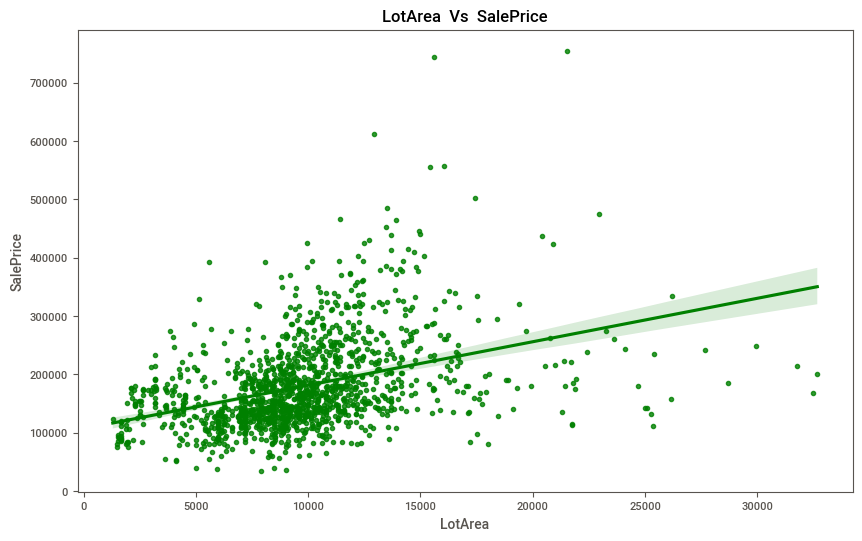

In [57]:
plt.figure(figsize=(10,6))
sns.regplot(df["LotArea"][:1460],df["SalePrice"][:1460],color = "green")
plt.title("LotArea  Vs  SalePrice")

In [58]:
df.Street.info()

<class 'pandas.core.series.Series'>
Int64Index: 2859 entries, 0 to 1458
Series name: Street
Non-Null Count  Dtype 
--------------  ----- 
2859 non-null   object
dtypes: object(1)
memory usage: 44.7+ KB


In [59]:
df[["Street"]] = OrdinalEncoder().fit_transform(df[["Street"]])

In [60]:
df["Street"].value_counts()

1.0    2849
0.0      10
Name: Street, dtype: int64

In [61]:
df[["Street","SalePrice"]].corr()

,Street,SalePrice
Street,1.000000,0.060386
SalePrice,0.060386,1.000000


In [62]:
df.drop("Street",axis=1,inplace = True)

In [63]:
from sklearn.preprocessing import OneHotEncoder
df.LotShape.value_counts()

Reg    1839
IR1     937
IR2      70
IR3      13
Name: LotShape, dtype: int64

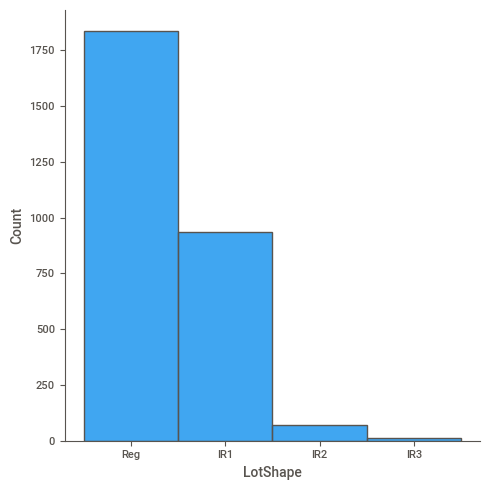

In [64]:
sns.displot(df.LotShape)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotShape', ylabel='count'>

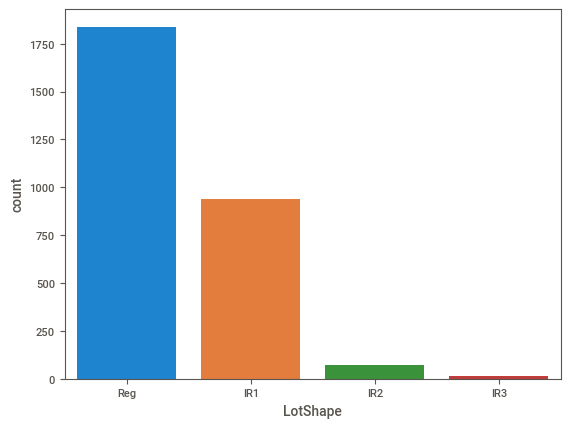

In [65]:
sns.countplot(df.LotShape)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

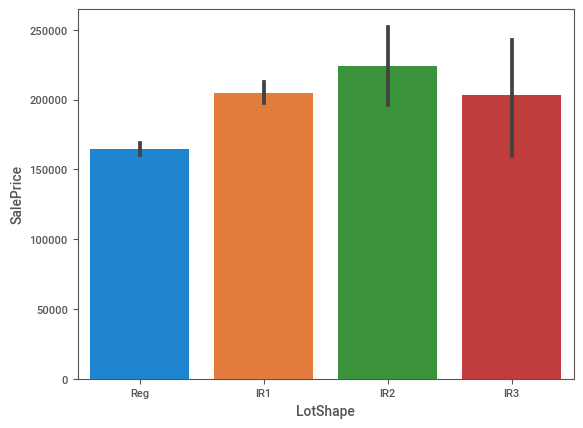

In [66]:
sns.barplot(df["LotShape"][:1460],df["SalePrice"][:1460])

In [67]:
pd.crosstab(df["LotShape"][:1460],df["SalePrice"].sum())

col_0,256510413.0
LotShape,
IR1,484
IR2,36
IR3,8
Reg,932


<AxesSubplot:xlabel='LotShape'>

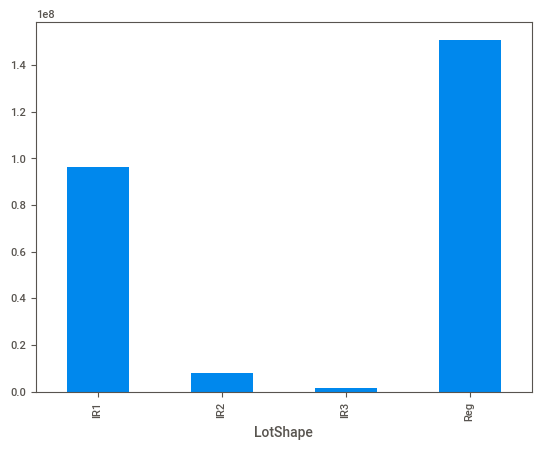

In [68]:
df.SalePrice.groupby(df["LotShape"]).sum().plot(kind="bar")

<AxesSubplot:xlabel='SalePrice', ylabel='LotShape'>

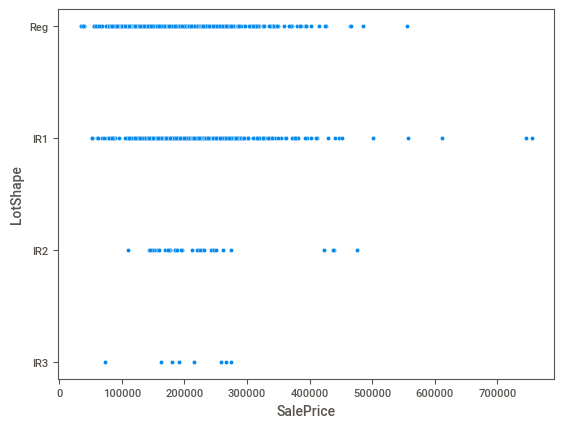

In [69]:
sns.scatterplot(y= df["LotShape"][:1460],x=df["SalePrice"][:1460])

In [70]:
dis = (df.SalePrice.loc[df["LotShape"]=="IR3"][:1460])
dis.sum()

1625365.0

In [71]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df["LotShape"] = oe.fit_transform(df[["LotShape"]])
df.LotShape.value_counts()

3.0    1839
0.0     937
1.0      70
2.0      13
Name: LotShape, dtype: int64

In [72]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDe

In [73]:
cols = df.columns
cols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDe

In [74]:
Features_null.pop(1)

('Alley', 2721)

In [75]:
df.shape

(2859, 80)

In [76]:
df.drop('Fence',inplace=True,axis=1)
df.drop('Alley',inplace=True,axis=1)

In [78]:
df.fillna(method = "ffill",inplace=True)

In [79]:
df.isnull().sum().sum()

202

In [80]:
c=0
for i in df.dtypes:
    if i == 'object':
        c+=1
        
print(c)

38


In [101]:
cat_assosiations = ['OverallQual','Neighborhood','GarageCars','FullBath','GarageFinish',
                    'Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']

In [82]:
enc = []
for i in cat_assosiations:
    if df[i].dtype == 'object':
        enc.append(i)
enc

['Neighborhood',
 'GarageFinish',
 'Foundation',
 'GarageType',
 'BsmtFinType1',
 'HeatingQC']

In [83]:
for i in enc:
    dff[[i]]= OrdinalEncoder().fit_transform(dff[[i]])

In [100]:
num_associations = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt',
                   'MasVnrArea','WoodDeckSF','2ndFlrSF','OpenPorchSF']
#Dobule Check
for i in num_associations:
    print(df[i].dtype)

int64
float64
float64
int64
int64
int64
int64
float64
float64
int64
int64
int64


In [85]:
len(num_associations)+len(cat_assosiations)

22

In [106]:
X = num_associations + cat_assosiations
X

['GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'OverallQual',
 'Neighborhood',
 'GarageCars',
 'FullBath',
 'GarageFinish',
 'Foundation',
 'GarageType',
 'Fireplaces',
 'BsmtFinType1',
 'HeatingQC']

In [107]:
trainx = dff[X]

In [108]:
trainx.isnull().sum()

GrLivArea        0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MasVnrArea       8
WoodDeckSF       0
2ndFlrSF         0
OpenPorchSF      0
OverallQual      0
Neighborhood     0
GarageCars       0
FullBath         0
GarageFinish    81
Foundation       0
GarageType      81
Fireplaces       0
BsmtFinType1    37
HeatingQC        0
dtype: int64

In [109]:
dff.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [110]:
x = trainx
y = dff.SalePrice
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1460 non-null   int64  
 1   GarageArea    1460 non-null   int64  
 2   TotalBsmtSF   1460 non-null   int64  
 3   1stFlrSF      1460 non-null   int64  
 4   TotRmsAbvGrd  1460 non-null   int64  
 5   YearBuilt     1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   GarageYrBlt   1379 non-null   float64
 8   MasVnrArea    1452 non-null   float64
 9   WoodDeckSF    1460 non-null   int64  
 10  2ndFlrSF      1460 non-null   int64  
 11  OpenPorchSF   1460 non-null   int64  
 12  OverallQual   1460 non-null   int64  
 13  Neighborhood  1460 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  GarageFinish  1379 non-null   float64
 17  Foundation    1460 non-null   float64
 18  GarageType    1379 non-null 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

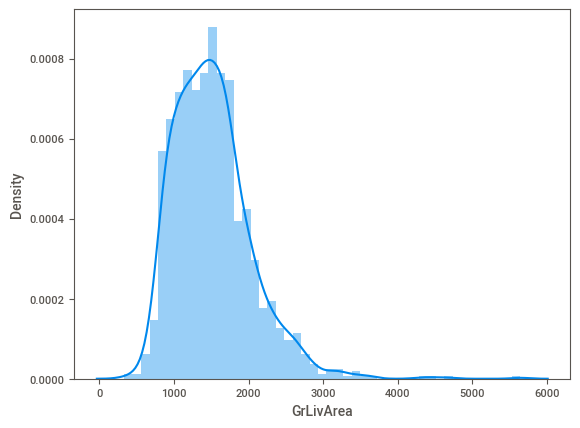

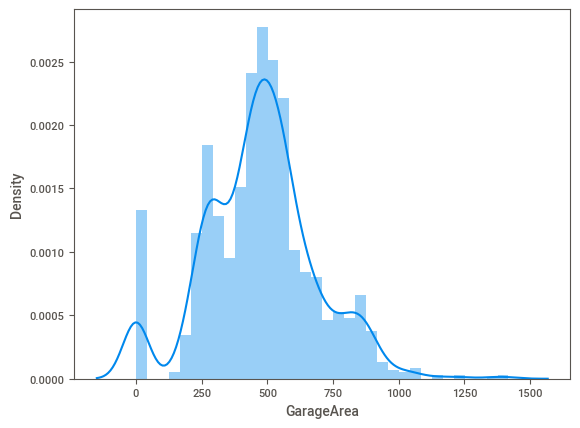

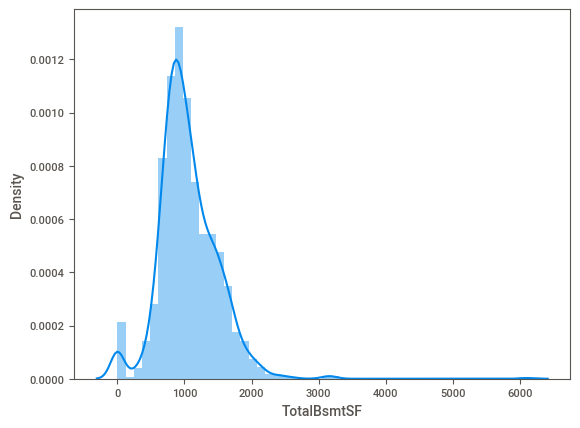

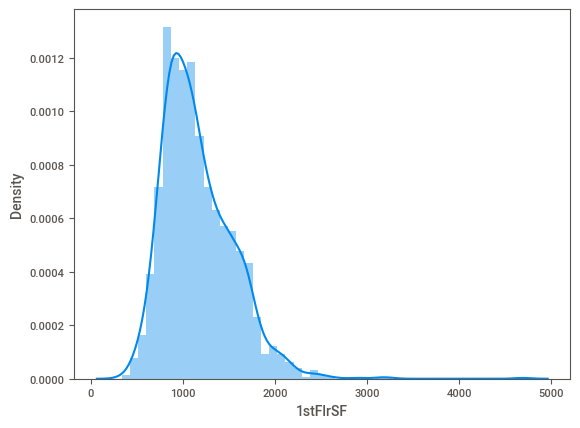

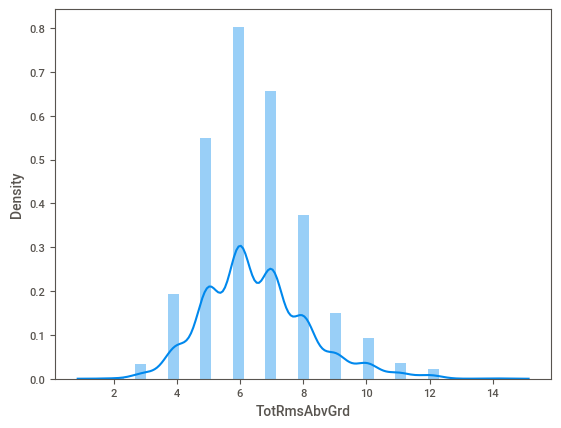

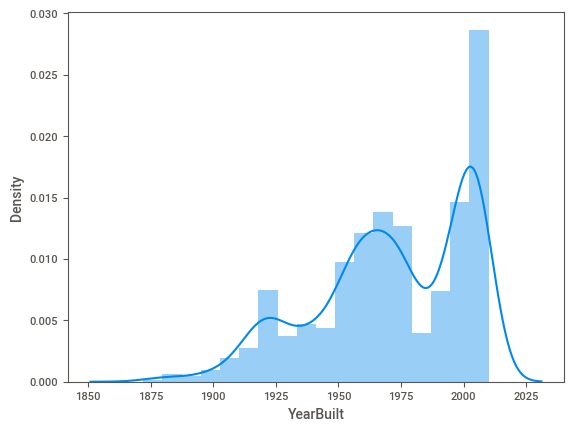

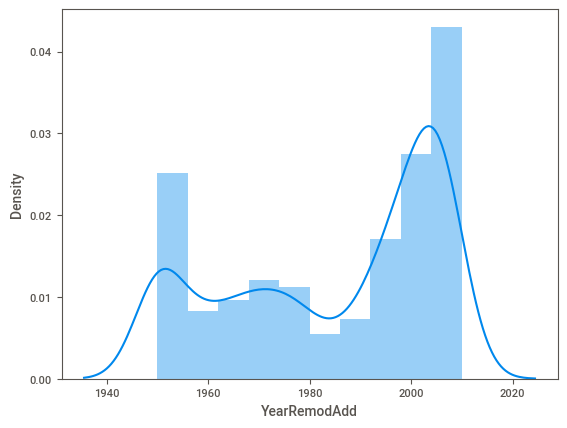

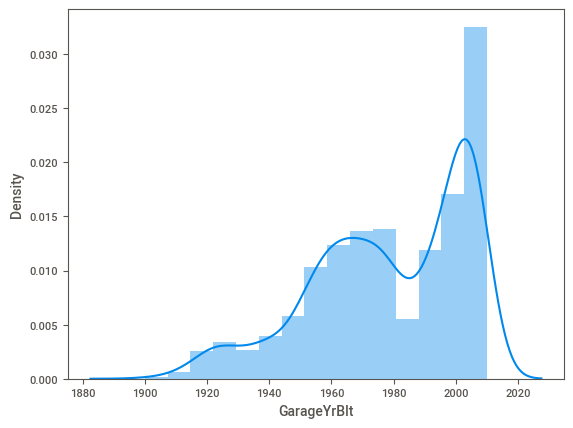

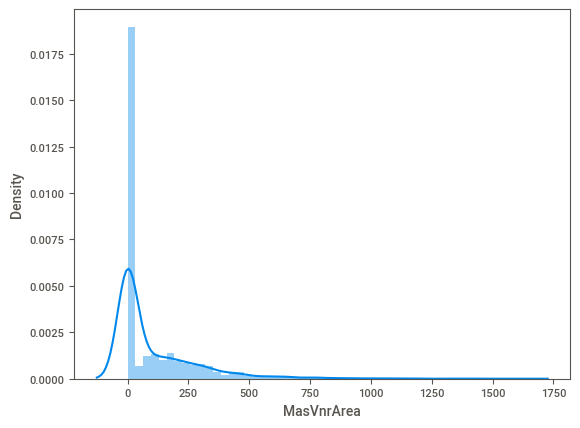

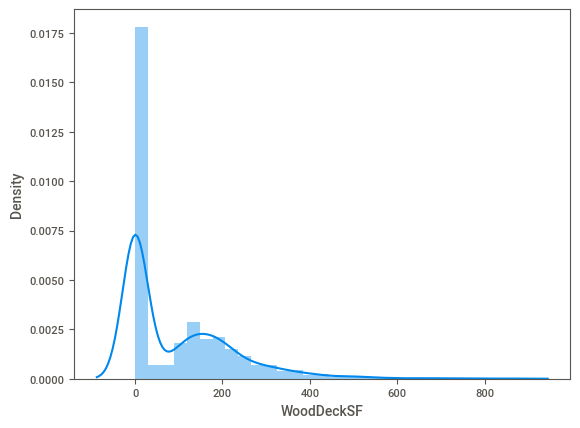

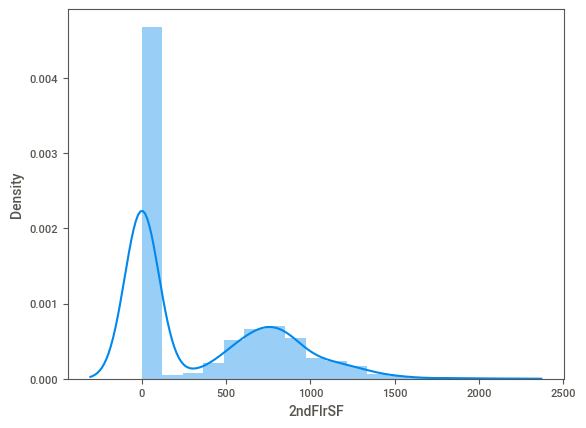

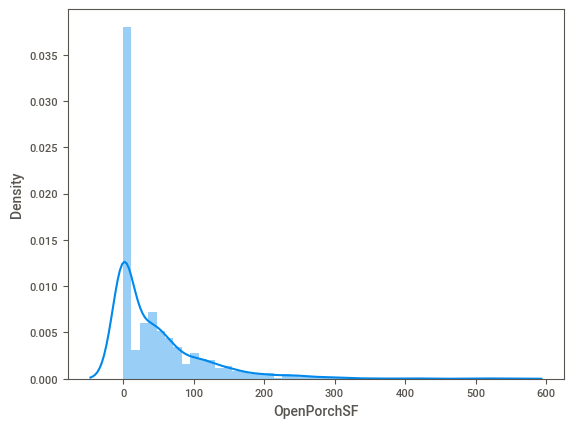

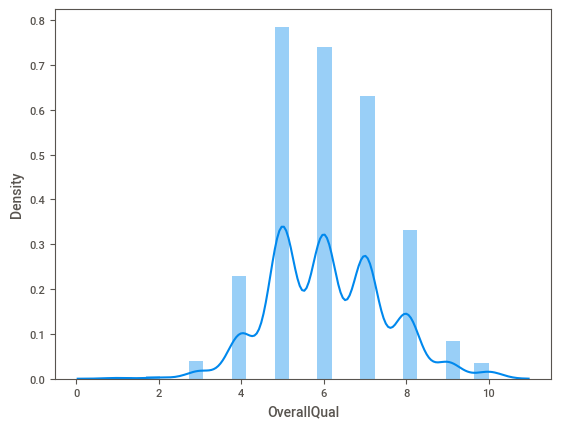

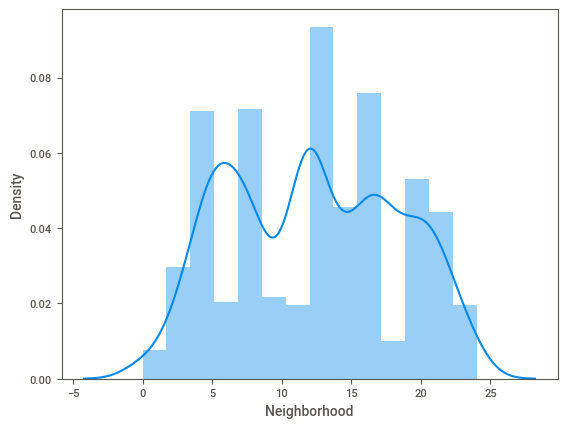

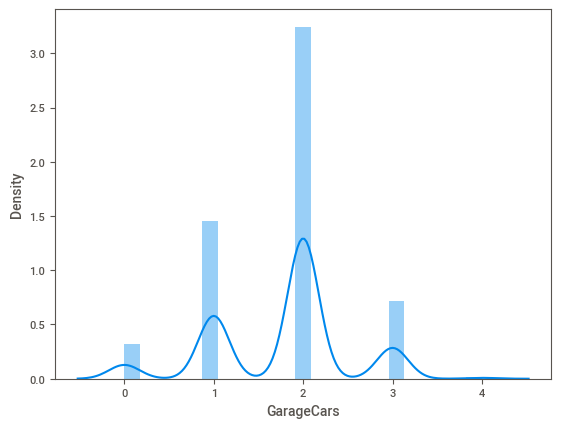

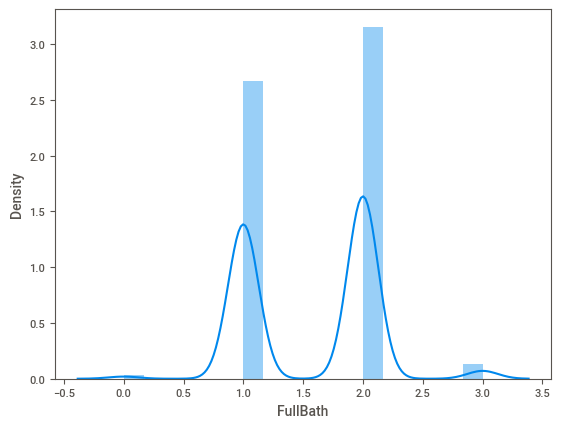

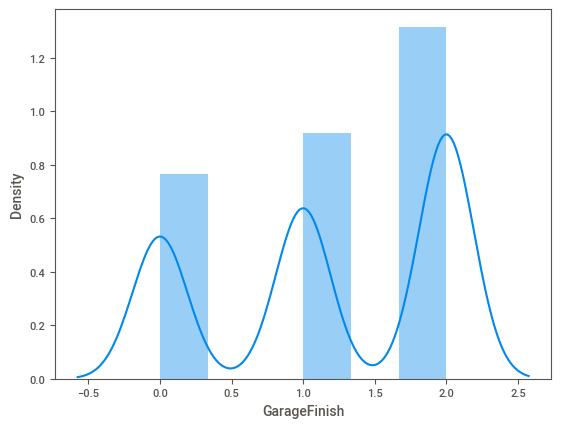

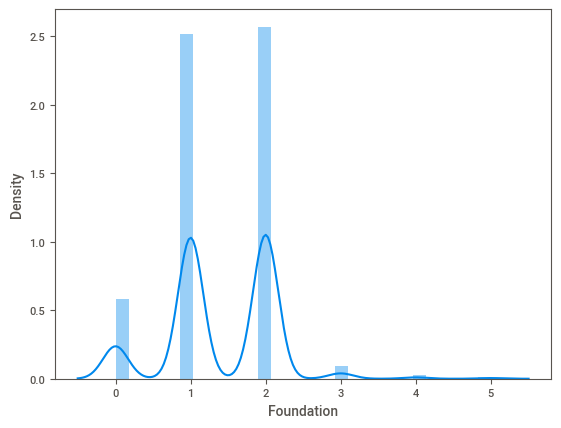

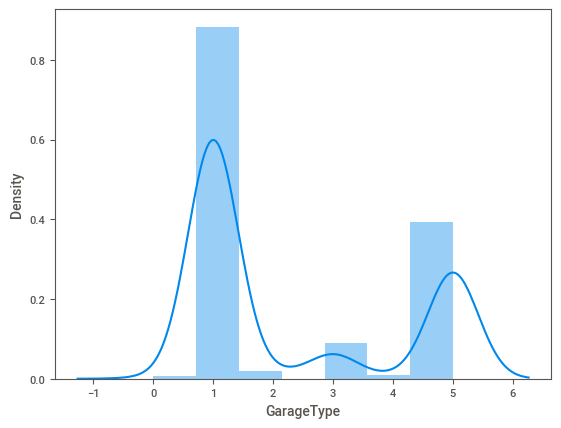

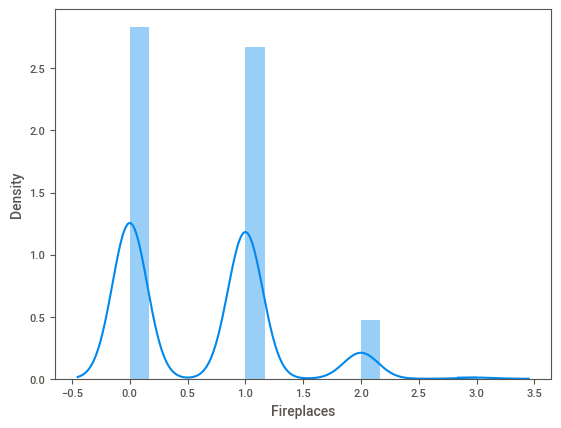

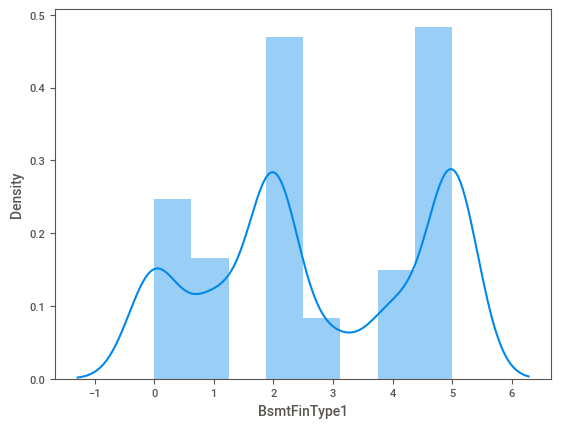

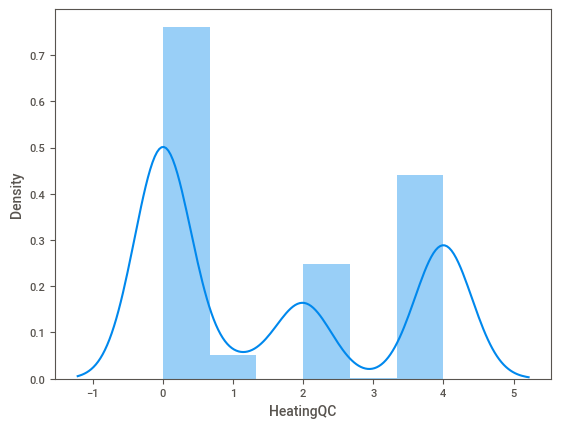

In [111]:
for i in x:
    plt.subplots()
    sns.distplot(x[i])

In [112]:
c=0
for i in df.SalePrice:
    c+=1
    if i ==0:
        
        break
print(c)

2859


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

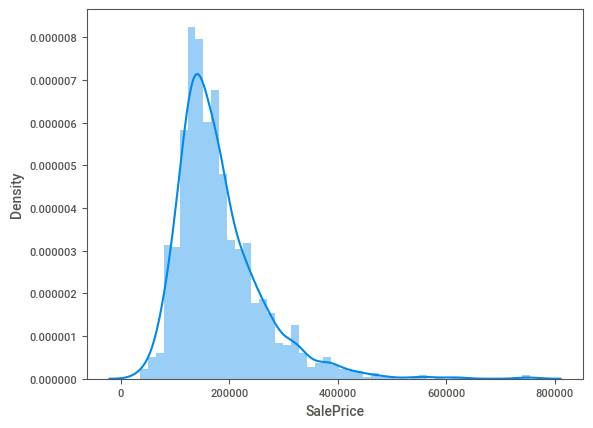

In [113]:
sns.distplot(dff.SalePrice)

In [114]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

transformers = ['GrLivArea',
'GarageArea',
'TotalBsmtSF',
'1stFlrSF',
'MasVnrArea',
'WoodDeckSF',
'2ndFlrSF',
'OpenPorchSF']

transformers

['GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'MasVnrArea',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF']

In [115]:
for i in transformers:
    x[[i]] = mm.fit_transform(x[[i]])

C:\Users\Tejavarma\AppData\Local\Temp\ipykernel_8428\3447020123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[[i]] = mm.fit_transform(x[[i]])
C:\Users\Tejavarma\AppData\Local\Temp\ipykernel_8428\3447020123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[[i]] = mm.fit_transform(x[[i]])
C:\Users\Tejavarma\AppData\Local\Temp\ipykernel_8428\3447020123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [116]:
x

,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,WoodDeckSF,...,OverallQual,Neighborhood,GarageCars,FullBath,GarageFinish,Foundation,GarageType,Fireplaces,BsmtFinType1,HeatingQC
0,0.259231,0.386460,0.140098,0.119780,8,2003,2003,2003.0,0.122500,0.000000,...,7,5.0,2,2,1.0,2.0,1.0,0,2.0,0.0
1,0.174830,0.324401,0.206547,0.212942,6,1976,1976,1976.0,0.000000,0.347725,...,6,24.0,2,2,1.0,1.0,1.0,1,0.0,0.0
2,0.273549,0.428773,0.150573,0.134465,6,2001,2002,2001.0,0.101250,0.000000,...,7,5.0,2,2,1.0,2.0,1.0,1,2.0,0.0
3,0.260550,0.452750,0.123732,0.143873,7,1915,1970,1998.0,0.000000,0.000000,...,7,6.0,3,1,2.0,0.0,5.0,1,0.0,2.0
4,0.351168,0.589563,0.187398,0.186095,9,2000,2000,2000.0,0.218750,0.224037,...,8,15.0,3,2,1.0,2.0,1.0,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.247362,0.324401,0.155974,0.142038,7,1999,2000,1999.0,0.000000,0.000000,...,6,8.0,2,2,1.0,2.0,1.0,1,5.0,0.0
1456,0.327619,0.352609,0.252373,0.399036,7,1978,1988,1978.0,0.074375,0.407235,...,6,14.0,2,2,2.0,1.0,1.0,2,0.0,4.0
1457,0.377920,0.177715,0.188543,0.195961,9,1941,2006,1941.0,0.000000,0.000000,...,7,6.0,1,2,1.0,4.0,1.0,2,2.0,0.0
1458,0.140166,0.169252,0.176432,0.170721,5,1950,1996,1950.0,0.000000,0.427071,...,5,12.0,1,1,2.0,1.0,1.0,0,2.0,2.0


In [117]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(x,y)

In [124]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.0/1.0 MB 114.6 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [125]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor()
reg.fit(trainx,testx,trainy,testy)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:12<00:00,  1.73s/it]


(                               Adjusted R-Squared  R-Squared      RMSE  \
 Model                                                                    
 ExtraTreesRegressor                          0.88       0.89  25611.83   
 GradientBoostingRegressor                    0.88       0.89  25996.91   
 XGBRegressor                                 0.88       0.89  26069.94   
 RandomForestRegressor                        0.86       0.87  28159.26   
 LGBMRegressor                                0.85       0.86  29457.32   
 HistGradientBoostingRegressor                0.84       0.85  29917.73   
 BaggingRegressor                             0.83       0.84  31280.61   
 AdaBoostRegressor                            0.81       0.82  32988.65   
 KNeighborsRegressor                          0.71       0.73  40347.45   
 ExtraTreeRegressor                           0.70       0.72  40991.17   
 TweedieRegressor                             0.70       0.71  41604.10   
 ElasticNet              

In [126]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [127]:
dff.fillna(method='bfill',inplace=True)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1455 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [128]:
cats = []
for i in dff:
    if dff[i].dtype == 'object':
        cats.append(i)
cats

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [129]:
for i in cats:
    dff[[i]] = OrdinalEncoder().fit_transform(dff[[i]])
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   float64
 6   Alley          1455 non-null   float64
 7   LotShape       1460 non-null   float64
 8   LandContour    1460 non-null   float64
 9   Utilities      1460 non-null   float64
 10  LotConfig      1460 non-null   float64
 11  LandSlope      1460 non-null   float64
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   float64
 14  Condition2     1460 non-null   float64
 15  BldgType       1460 non-null   float64
 16  HouseStyle     1460 non-null   float64
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [130]:
tx = dff.drop(['SalePrice','Id'],axis=1)
tx

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3.00,65.00,8450,1.00,0.00,3.00,3.00,0.00,4.00,...,0,0,0.00,2.00,2.00,0,2,2008,8.00,4.00
1,20,3.00,80.00,9600,1.00,0.00,3.00,3.00,0.00,2.00,...,0,0,0.00,2.00,2.00,0,5,2007,8.00,4.00
2,60,3.00,68.00,11250,1.00,0.00,0.00,3.00,0.00,4.00,...,0,0,0.00,2.00,2.00,0,9,2008,8.00,4.00
3,70,3.00,60.00,9550,1.00,0.00,0.00,3.00,0.00,0.00,...,0,0,0.00,2.00,2.00,0,2,2006,8.00,0.00
4,60,3.00,84.00,14260,1.00,0.00,0.00,3.00,0.00,2.00,...,0,0,0.00,2.00,2.00,0,12,2008,8.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3.00,62.00,7917,1.00,NaN,3.00,3.00,0.00,4.00,...,0,0,NaN,2.00,2.00,0,8,2007,8.00,4.00
1456,20,3.00,85.00,13175,1.00,NaN,3.00,3.00,0.00,4.00,...,0,0,NaN,2.00,2.00,0,2,2010,8.00,4.00
1457,70,3.00,66.00,9042,1.00,NaN,3.00,3.00,0.00,4.00,...,0,0,NaN,0.00,2.00,2500,5,2010,8.00,4.00
1458,20,3.00,68.00,9717,1.00,NaN,3.00,3.00,0.00,4.00,...,0,0,NaN,NaN,NaN,0,4,2010,8.00,4.00


In [131]:
ty = dff.SalePrice
for i in tx:
    dff[[i]] = mm.fit_transform(dff[[i]])
dff[['SalePrice']] = mm.fit_transform(dff[['SalePrice']])
trx,tstx,tr_y,tst_y = train_test_split(tx,ty)
reg.fit(trx,tstx,tr_y,tst_y)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:31<00:00,  2.17s/it]


(                                     Adjusted R-Squared  \
 Model                                                     
 HistGradientBoostingRegressor                      0.87   
 RandomForestRegressor                              0.87   
 GradientBoostingRegressor                          0.87   
 LGBMRegressor                                      0.87   
 ExtraTreesRegressor                                0.86   
 PoissonRegressor                                   0.86   
 BaggingRegressor                                   0.85   
 XGBRegressor                                       0.85   
 GammaRegressor                                     0.85   
 HuberRegressor                                     0.83   
 PassiveAggressiveRegressor                         0.83   
 LassoLarsIC                                        0.82   
 LassoCV                                            0.82   
 BayesianRidge                                      0.82   
 LassoLarsCV                            

## Comparision of Ridge and RMSE

##### Model | R-Squared | RMSE

##### Ridge | 0.87 | 0.04

##### Lasso | -0.00 | 0.11